<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 6</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno <p>
</div>

UNIVARIATE TIME SERIES FORCASTING =
Ventas por dias


In [ ]:
# Ejemplo de red univariante lstm
import numpy as np
from tensorflow.keras.models import Sequential # para construir modelos de redes neuronales de manera secuencial capa por capa.
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense #cada neurona está conectada a todas las neuronas de la capa anterior.
from tensorflow.keras.layers import Flatten # Su propósito es aplanar (flatten) los datos multidimensionales de entrada en una única dimensión.
from array import array

In [ ]:
# preparar features independientes y dependientes
def prepare_data(timeseries_data, n_features):

	X, y =[],[]
	for i in range(len(timeseries_data)):
		# encontrar el final de este patrón
		# ej = 110,125,133 es "x" / end_ix= 146
		end_ix = i + n_features
		# comprobar si estamos más allá de la secuencia
		if end_ix > len(timeseries_data)-1:
			break
		# reunir partes de entrada y salida del patrón
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

Definimos la secuencia de datos, nuestra serie de tiempo:

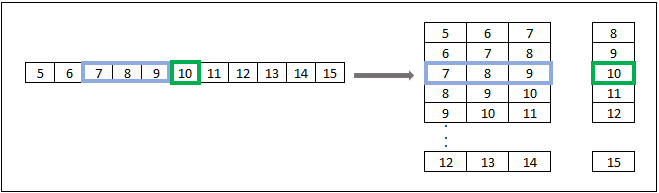

In [ ]:
# definir secuencia de entrada
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# elegir el numero de pasos en el tiempo
n_steps = 3
# dividir en muestras
# preparo las variables dependientes e independientes.
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

Ahora debemos estructurar los datos en lotes (batches) y en tensores 3D con la forma (número de muestras, pasos de tiempo, características) necesaria para aplicar LSTM:

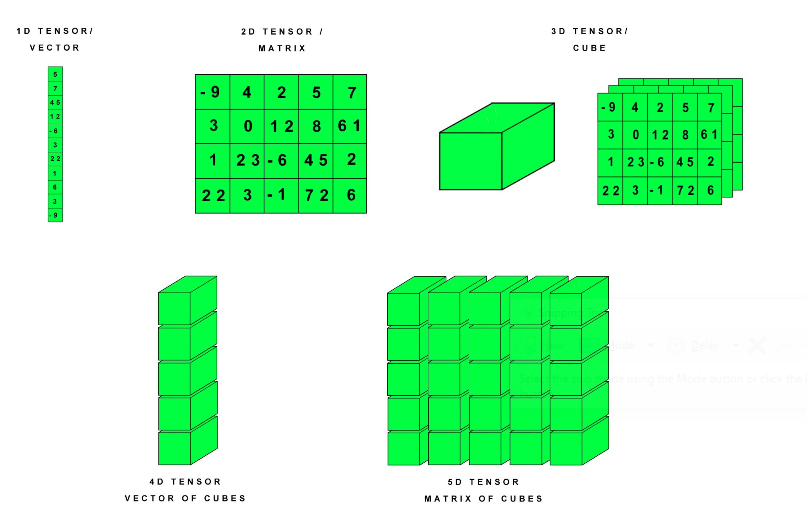

El propósito de esta línea de código es reorganizar las dimensiones de X para que sea compatible con la entrada esperada por una red LSTM. Las redes LSTM en Keras (o TensorFlow) esperan un tensor tridimensional con las siguientes dimensiones:

Dimensión 1: Número de muestras. Es cuántos conjuntos de datos tenemos para entrenar la red
Dimensión 2: Longitud de cada secuencia (pasos de tiempo). cuántos puntos en el tiempo consecutivos usamos como entrada
Dimensión 3: Número de características (features) en cada paso de tiempo.

In [ ]:
X.shape[0]

6

In [ ]:
X.shape[1]

3

In [ ]:
# remodelar de [samples, timesteps] a [samples, timesteps, features]
n_features = 1  # para convertir X en una variable de 3 dimensiones.Este valor indica el número de características en la entrada,
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [ ]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

Construimos el modelo LSTM

[Parametros del optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

50 unidades de memoria (neuronas).
activation='relu' especifica que la función de activación de las unidades LSTM será ReLU (Rectified Linear Unit).
Se agrega una capa "dense" con 1 neurona. Esta capa se usa para generar la salida final del modelo después de procesar la secuencia con la capa LSTM.Se utiliza el optimizador Nadam. La función de pérdida se establece como el error cuadrático medio (MSE)

Comentario extra =
Funciones de Activación comunes:
Sigmoid (Sigmoide), Tanh (Tangente hiperbólica) .
Optimizadores comunes:
Adam: , SGD (Stochastic Gradient Descent).

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))  # 50 es el numero de neuronas de la capa lstm
model.add(Dense(1))  # nodo de salida
model.compile(optimizer='Nadam', loss='mse')

# fit del modelo
model.fit(X, y, epochs=50, verbose=1) # Epoch. Este es el numero de veces que se ejecutaran los algoritmos

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 35694.9453
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 34917.5352
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 34463.7148
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 34079.0078
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 33718.1055
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33364.1836
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33007.8828
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32641.5488
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 32256.9199
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 31843.4141
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 31384.2734
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 30848.7793
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 30180.9277
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 29301.7012
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss

**Predicción: Queremos predecir para un horizonte temporal de 10 días:**


In [ ]:

import numpy as np

x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)



# definir secuencia de entrada
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

[245.78448]
1 day input [196.         210.         245.78448486]
1 day output [[266.65442]]
2 day input [210.         245.78448486 266.65441895]
2 day output [[293.5751]]
3 day input [245.78448 266.65442 293.5751 ]
3 day output [[327.68594]]
4 day input [266.65442 293.5751  327.68594]
4 day output [[359.378]]
5 day input [293.5751  327.68594 359.378  ]
5 day output [[396.48645]]
6 day input [327.68594 359.378   396.48645]
6 day output [[437.1953]]
7 day input [359.378   396.48645 437.1953 ]
7 day output [[480.93033]]
8 day input [396.48645 437.1953  480.93033]
8 day output [[529.5956]]
9 day input [437.1953  480.93033 529.5956 ]
9 day output [[582.80286]]
[245.78448, 266.65442, 293.5751, 327.68594, 359.378, 396.48645, 437.1953, 480.93033, 529.5956, 582.80286]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)

9

Vizualizamos el output

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

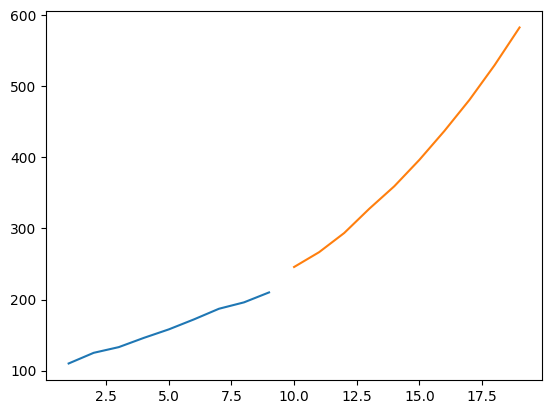

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)